In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import healpy as hp
from astropy.coordinates import SkyCoord
import os
import sys
sys.path.insert(0, '/home/aew492/lss-dipoles')
import tools
from Secrest_dipole import SecrestDipole
from multipoles import compute_Cells_from_map
import dipole

### inputs

In [3]:
# inputs used across the entire notebook
NSIDE = 64

# kwargs for quaia to pass to SecrestDipole() to load (except blim since this is what we'll vary)
quaia_kwargs = dict(initial_catfn='quaia_G20.0.fits', catname='quaia', mag='G',
                    maglim=20., save_tag='_r1.0', load_init=False, compcorrect=True)

### fiducial sample

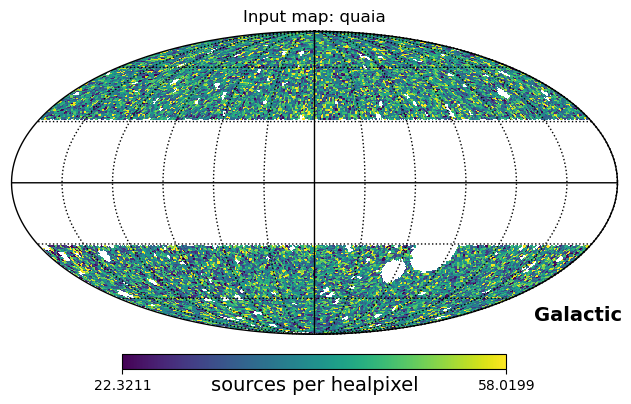

In [4]:
# load the source density table for the final sample (masked and density-corrected) and make healpix map
d = SecrestDipole(blim=30, **quaia_kwargs)
tab = d.load_hpxelatcorr()

map_to_fit = np.empty(hp.nside2npix(NSIDE))
map_to_fit[:] = np.nan
map_to_fit[tab['hpidx']] = tab['elatdenscorr']
mean, std = np.nanmean(map_to_fit), np.nanstd(map_to_fit)
fig = plt.figure(figsize=(8,4))
hp.mollview(map_to_fit, coord=['C','G'], title=f'Input map: {d.catname}', unit='sources per healpixel',
            badcolor='w', min=mean-2*std, max=mean+2*std, fig=fig)
hp.graticule()

In [5]:
# set a max ell to fit, and fit alms -> Cells to the input map
maxell = 6
ell, Cell = compute_Cells_from_map(map_to_fit, maxell)

Text(0.5, 1.0, 'Quaia G<20.0 fiducial Cells')

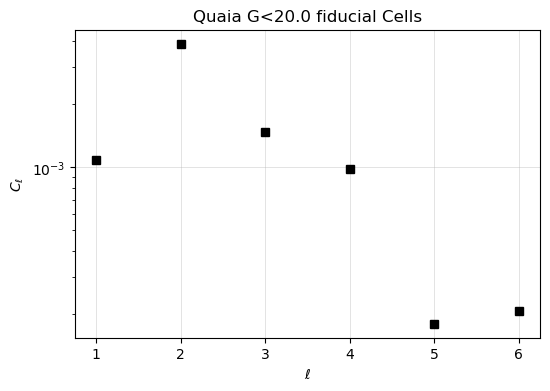

In [6]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(ell[1:], Cell[1:], 'ks', ls='None')
ax.semilogy()
ax.grid(lw=0.5, alpha=0.5)
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C_\ell$')
ax.set_title(f'Quaia G<{d.maglim:.1f} fiducial Cells')

### compare galactic plane cuts

In [13]:
# load the source density table for the final sample (masked and density-corrected) and make healpix map
blims = np.arange(0, 61, 5)

maxell = 6
Cells = np.empty((len(blims), maxell+1))

for i, blim in enumerate(blims):
    d = SecrestDipole(blim=blim, **quaia_kwargs)
    tab = d.load_hpxelatcorr()

    map_to_fit = np.empty(hp.nside2npix(NSIDE))
    map_to_fit[:] = np.nan
    map_to_fit[tab['hpidx']] = tab['elatdenscorr']
    
    ell, Cells[i] = compute_Cells_from_map(map_to_fit, maxell)

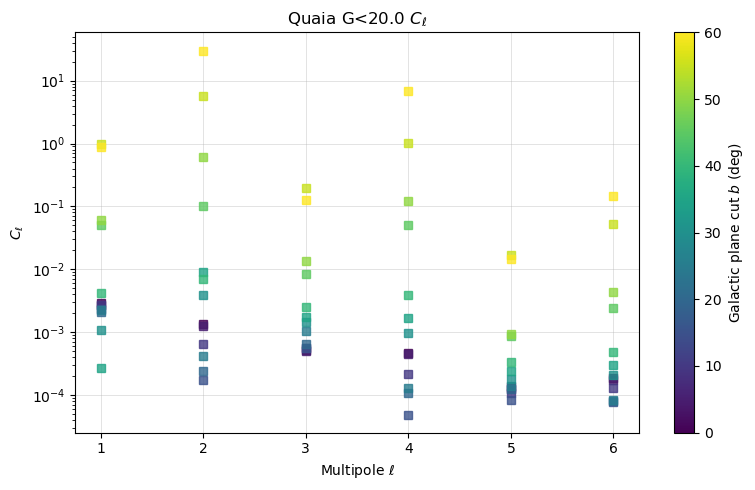

In [14]:
norm = mpl.colors.Normalize(vmin=min(blims), vmax=max(blims))
smap = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
fig, ax = plt.subplots(figsize=(8,5), tight_layout=True)
for i, Cell in enumerate(Cells):
    ax.plot(ell[1:], Cell[1:], marker='s', ls='None', alpha=0.8, c=smap.to_rgba(blims[i]))
ax.semilogy()
ax.grid(lw=0.5, alpha=0.5)
ax.set_xlabel(r'Multipole $\ell$')
ax.set_ylabel(r'$C_\ell$')
ax.set_title(f'Quaia G<{d.maglim:.1f} 'r'$C_\ell$')
fig.colorbar(smap, ax=ax, label=r'Galactic plane cut $b$ (deg)')

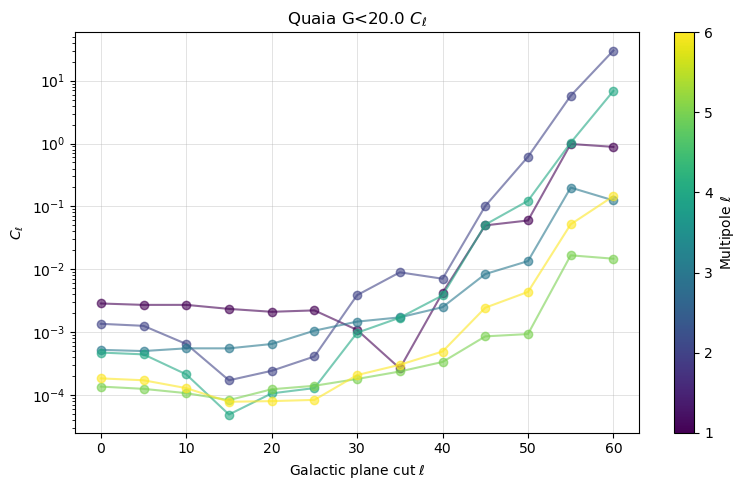

In [23]:
# look at dependence of the dipole amplitude
norm = mpl.colors.Normalize(vmin=1, vmax=maxell)
smap = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
fig, ax = plt.subplots(figsize=(8,5), tight_layout=True)
for i, ell in enumerate(np.arange(1, maxell+1)):
    ax.plot(blims, Cells[:,ell], 'o-', alpha=0.6, c=smap.to_rgba(ell))
ax.semilogy()
ax.grid(lw=0.5, alpha=0.5)
ax.set_xlabel(r'Galactic plane cut $\ell$')
ax.set_ylabel(r'$C_\ell$')
ax.set_title(f'Quaia G<{d.maglim:.1f} 'r'$C_\ell$')
fig.colorbar(smap, ax=ax, label=r'Multipole $\ell$')

### fit Cells with NO plane cut

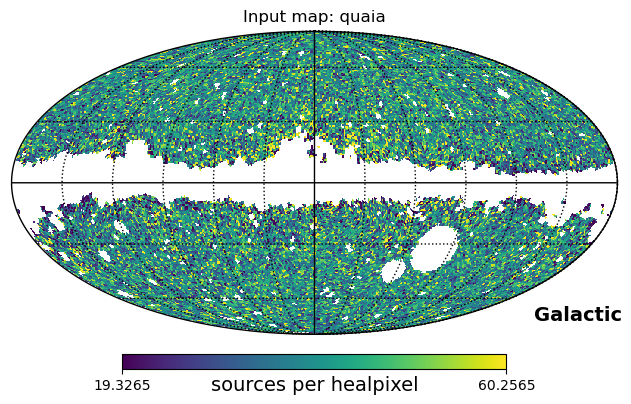

In [10]:
# load the source density table for the final sample (masked and density-corrected) and make healpix map
d = SecrestDipole(blim=0, **quaia_kwargs)
tab = d.load_hpxelatcorr()

map_to_fit = np.empty(hp.nside2npix(NSIDE))
map_to_fit[:] = np.nan
map_to_fit[tab['hpidx']] = tab['elatdenscorr']
mean, std = np.nanmean(map_to_fit), np.nanstd(map_to_fit)
fig = plt.figure(figsize=(8,4))
hp.mollview(map_to_fit, coord=['C','G'], title=f'Input map: {d.catname}', unit='sources per healpixel',
            badcolor='w', min=mean-2*std, max=mean+2*std, fig=fig)
hp.graticule()

In [11]:
# fit alms -> Cells to the input map
ell, Cell = compute_Cells_from_map(map_to_fit, maxell)

Text(0.5, 1.0, 'Quaia G<20.0 fiducial Cells')

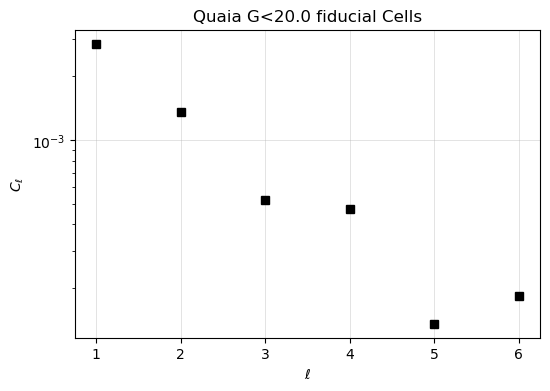

In [12]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(ell[1:], Cell[1:], 'ks', ls='None')
ax.semilogy()
ax.grid(lw=0.5, alpha=0.5)
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C_\ell$')
ax.set_title(f'Quaia G<{d.maglim:.1f} fiducial Cells')